In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from matplotlib import pyplot as plt
import os
import tarfile
import scipy.io as sio
import numpy as np
import random
import cv2

In [ ]:
def save_train_data(fnames, labels, bboxes):
    src_folder ='/tmp/car_ims'
    num_samples = len(fnames)

    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)

    for i in range(num_samples):
        fname = fnames[i][8:]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)

        src_image = cv2.imread(src_path)
        height, width = src_image.shape[:2]

        # margins of 16 pixels (Crop image according to a given bounding box)
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)

        if i in train_indexes:
            dst_folder = '/tmp/car_ims/train/'
        else:
            dst_folder = '/tmp/car_ims/valid/'

        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)
        dst_image = src_image[y1:y2, x1:x2]
        cv2.imwrite(dst_path, dst_image)

### Download and Separate Data

We first need to download the data from a remote server and seperate the data into training and testing sets. Note that you only need to download the data once, if you have downloaded the data before do not run the code in this section.

In [ ]:
!wget --no-check-certificate \
  http://imagenet.stanford.edu/internal/car196/car_ims.tgz \
  -O /tmp/car_ims.tgz

--2020-08-14 13:22:33--  http://imagenet.stanford.edu/internal/car196/car_ims.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1956628579 (1.8G) [application/x-gzip]
Saving to: ‘/tmp/car_ims.tgz’

/tmp/car_ims.tgz    100%[===================>]   1.82G  56.7MB/s    in 38s     

2020-08-14 13:23:11 (48.7 MB/s) - ‘/tmp/car_ims.tgz’ saved [1956628579/1956628579]



In [ ]:
!wget --no-check-certificate \
  http://imagenet.stanford.edu/internal/car196/cars_annos.mat \
  -O /tmp/cars_annos.mat

--2020-08-14 13:23:12--  http://imagenet.stanford.edu/internal/car196/cars_annos.mat
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394471 (385K) [text/plain]
Saving to: ‘/tmp/cars_annos.mat’

/tmp/cars_annos.mat 100%[===================>] 385.23K   978KB/s    in 0.4s    

2020-08-14 13:23:12 (978 KB/s) - ‘/tmp/cars_annos.mat’ saved [394471/394471]



In [ ]:
!wget --no-check-certificate \
  http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat \
  -O /tmp/cars_test_annos.mat

--2020-08-14 13:23:13--  http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185758 (181K) [text/plain]
Saving to: ‘/tmp/cars_test_annos.mat’

/tmp/cars_test_anno 100%[===================>] 181.40K   774KB/s    in 0.2s    

2020-08-14 13:23:13 (774 KB/s) - ‘/tmp/cars_test_annos.mat’ saved [185758/185758]



In [ ]:
!rm -rf /tmp/car_ims/train/
!rm -rf /tmp/car_ims/test/
!rm -rf /tmp/car_ims/valid/

Unzip the compressed data. (You do not need to understand how this works)

In [ ]:
local_tar = '/tmp/car_ims.tgz'
my_tar = tarfile.open(local_tar)
my_tar.extractall('/tmp')
my_tar.close()

In [ ]:
car_annotation= sio.loadmat('/tmp/cars_annos.mat')

annotations = car_annotation['annotations']
annotations = np.transpose(annotations)

fnames = []
class_ids = []
labels = []
bboxes  = []
for annotation in annotations:
  bbox_x1 = annotation[0][1][0][0]
  bbox_y1 = annotation[0][2][0][0]
  bbox_x2 = annotation[0][3][0][0]
  bbox_y2 = annotation[0][4][0][0]

  class_id = annotation[0][5][0][0]
  bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
  labels.append(f'{class_id:06}')

  file_name = annotation[0][0][0]
  class_ids.append(class_id)
  fnames.append(file_name)

labels_count = np.unique(class_ids).shape[0]
print(np.unique(class_ids))
print('The number of different cars is %d' % labels_count)

save_train_data(fnames, labels, bboxes)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196]
The number of different cars is 196


In [ ]:
print(car_annotation)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015', '__version__': '1.0', '__globals__': [], 'annotations': array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        ...,
        (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uin

### Create a data generator

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
train_iter = datagen.flow_from_directory('/tmp/car_ims/train/', class_mode='categorical', batch_size=32, target_size=(224,224))
test_iter = datagen.flow_from_directory('/tmp/car_ims/valid/', class_mode='categorical', batch_size=32, target_size=(224,224))

Found 12948 images belonging to 196 classes.
Found 3237 images belonging to 196 classes.


In [ ]:
print(train_iter[0][0].shape)

(32, 224, 224, 3)


### Build Model

In [ ]:
# TODO

from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras import optimizers

base = applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=(224,224,3))
x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.6)(x)
pred_layer = layers.Dense(196, activation='softmax')(x)

for layer in net.layers[:30]:
    layer.trainable=False
for layer in net.layers[30:]:
    layer.trainable=True

net = Model(inputs=base.input, outputs=pred_layer)
#net.summary()


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/tmp/car_ims/train/', target_size=(224, 224), class_mode='categorical', batch_size=32)
test_generator = test_datagen.flow_from_directory('/tmp/car_ims/valid/', target_size=(224, 224), class_mode='categorical', batch_size=32)

print(train_generator[0][0].shape)
print(test_generator[0][0].shape)

Found 12948 images belonging to 196 classes.
Found 3237 images belonging to 196 classes.
(32, 224, 224, 3)
(32, 224, 224, 3)


In [ ]:
net.compile(optimizer=optimizers.Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
slow_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor = 0.1, patience = 1)

with tf.device("GPU:0"):
    history = net.fit(train_generator, steps_per_epoch=100, epochs=50, validation_data=test_generator, callbacks=[slow_lr])

Epoch 1/50
100/100 [==============================] - 106s 1s/step - loss: 6.5911 - accuracy: 0.0094 - val_loss: 5.2001 - val_accuracy: 0.0179
Epoch 2/50
100/100 [==============================] - 104s 1s/step - loss: 5.6781 - accuracy: 0.0281 - val_loss: 4.8143 - val_accuracy: 0.0584
Epoch 3/50
100/100 [==============================] - 104s 1s/step - loss: 5.1428 - accuracy: 0.0547 - val_loss: 4.4383 - val_accuracy: 0.0948
Epoch 4/50
100/100 [==============================] - 103s 1s/step - loss: 4.4825 - accuracy: 0.1034 - val_loss: 3.8962 - val_accuracy: 0.1708
Epoch 5/50
100/100 [==============================] - 103s 1s/step - loss: 3.9487 - accuracy: 0.1594 - val_loss: 3.3490 - val_accuracy: 0.2323
Epoch 6/50
100/100 [==============================] - 103s 1s/step - loss: 3.4371 - accuracy: 0.2309 - val_loss: 3.2057 - val_accuracy: 0.2586
Epoch 7/50
100/100 [==============================] - 103s 1s/step - loss: 2.9677 - accuracy: 0.3088 - val_loss: 2.5333 - val_accuracy: 0.3775

In [ ]:
net.metrics_names

['loss', 'accuracy']

In [ ]:
evaluation = net.evaluate(test_generator)
print('accuracy:', evaluation[1])
print('loss:', evaluation[0])

102/102 [==============================] - 25s 241ms/step - loss: 0.5763 - accuracy: 0.8350
accuracy: 0.8350324630737305
loss: 0.57626873254776


In [ ]:
evaluation = net.evaluate(train_generator)
print('accuracy:', evaluation[1])
print('loss:', evaluation[0])

405/405 [==============================] - 205s 507ms/step - loss: 0.3040 - accuracy: 0.9198
accuracy: 0.9197559356689453
loss: 0.3039795160293579


Text(0.5, 1.0, 'Car Classification using ResNet152 V2')

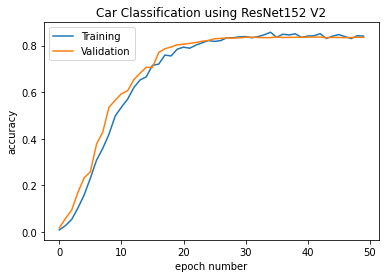

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epoch number")
plt.ylabel("accuracy")
plt.legend(['Training','Validation'])
plt.title("Car Classification using ResNet152 V2")

Text(0.5, 1.0, 'Car Classification using ResNet152 V2')

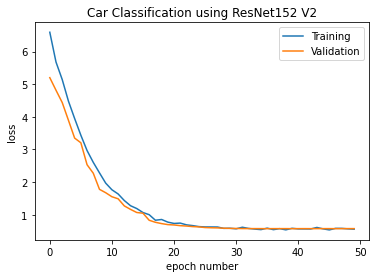

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch number")
plt.ylabel("loss")
plt.legend(['Training','Validation'])
plt.title("Car Classification using ResNet152 V2")

In [ ]:
print(test_generator)

In [ ]:
test_generator2 = test_datagen.flow_from_directory('/tmp/car_ims/valid/', target_size=(224, 224), class_mode='categorical', batch_size=3237)
X, y = next(test_generator2)

Found 3237 images belonging to 196 classes.


In [ ]:
yhat = net.predict(X)
max_yhat = np.argmax(yhat, axis = -1)

In [ ]:
y_true = np.argmax(y, axis = -1)

In [ ]:
print(max_yhat[:20])
print(y_true[:20])

[ 14 186 150  62   5 187 155 180 157  90 160 190 155  84  27 148 152  80
 108 113]
[ 14 133 150  62   5 187 155 180 157  90 160 190 155  84  27 148 152  80
 108 113]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, max_yhat)

In [ ]:
cm

array([[13,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  3, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 19,  0,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0,  0, 15]])

In [ ]:
column_sums = np.sum(cm, axis=1)
row_sums = np.sum(cm, axis=0)
full_sum = np.sum(cm)

for i in range(196):
  correct = cm[i][i]
  total = column_sums[i]
  accuracy = correct/total
  print('class',i,':',accuracy)

class 0 : 0.9285714285714286
class 1 : 0.7142857142857143
class 2 : 0.8666666666666667
class 3 : 0.75
class 4 : 0.5
class 5 : 0.8823529411764706
class 6 : 0.8461538461538461
class 7 : 0.65
class 8 : 0.7058823529411765
class 9 : 0.6666666666666666
class 10 : 0.7692307692307693
class 11 : 0.6875
class 12 : 0.75
class 13 : 0.5333333333333333
class 14 : 0.9375
class 15 : 0.5714285714285714
class 16 : 0.36363636363636365
class 17 : 0.6842105263157895
class 18 : 0.7619047619047619
class 19 : 0.9333333333333333
class 20 : 0.3888888888888889
class 21 : 0.5217391304347826
class 22 : 0.7333333333333333
class 23 : 0.95
class 24 : 0.7
class 25 : 0.9
class 26 : 0.6153846153846154
class 27 : 0.8823529411764706
class 28 : 0.7222222222222222
class 29 : 0.9090909090909091
class 30 : 0.75
class 31 : 1.0
class 32 : 0.8421052631578947
class 33 : 0.6666666666666666
class 34 : 1.0
class 35 : 0.875
class 36 : 0.8571428571428571
class 37 : 0.9166666666666666
class 38 : 0.7368421052631579
class 39 : 0.89473684

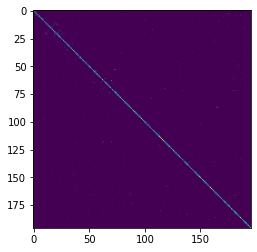

In [ ]:
plt.imshow(cm)

## Sources

Stanford Dataset:
3D Object Representations for Fine-Grained Categorization Jonathan Krause, 
    Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE Workshop on 3D Representation 
    and Recognition, at ICCV 2013 3D (3dRR-13). Sydney, Australia. Dec. 8, 2013.

ResNet152 V2:
[Identity Mappings in Deep Residual Networks] (https://arxiv.org/abs/1603.
    05027) (CVPR 2016)



